## Import modules

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils 
import time

In [25]:
# load and preprocess the image
def load_and_preprocess(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (1280, 720))
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image, gray_image

# subtract images
def subtract_images(image1, image2):
    diff = cv2.absdiff(image1, image2)
    _, thresh = cv2.threshold(diff, 50, 255, cv2.THRESH_BINARY)
    return diff, thresh

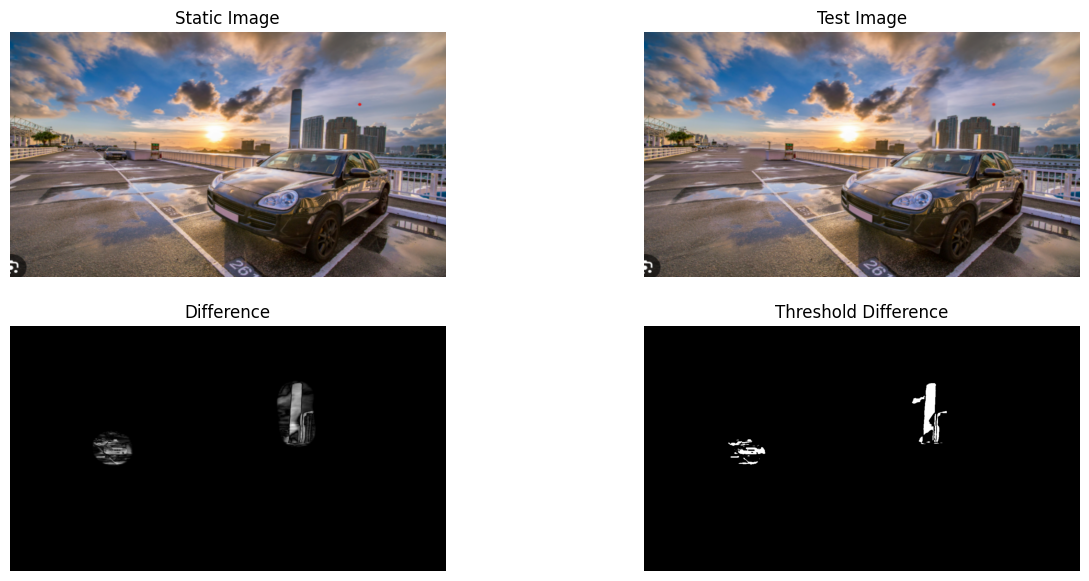

In [27]:
image_path1 = 'static.png'
image_path2 = 'test.png'

image1, gray_image1 = load_and_preprocess(image_path1)
image2, gray_image2 = load_and_preprocess(image_path2)

# subtract the images
diff, thresh = subtract_images(gray_image1, gray_image2)

# plot the images
plt.figure(figsize=(15, 7))

plt.subplot(2, 2, 1)
plt.title('Static Image')
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Test Image')
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Difference')
plt.imshow(diff, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Threshold Difference')
plt.imshow(thresh, cmap='gray')
plt.axis('off')

plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

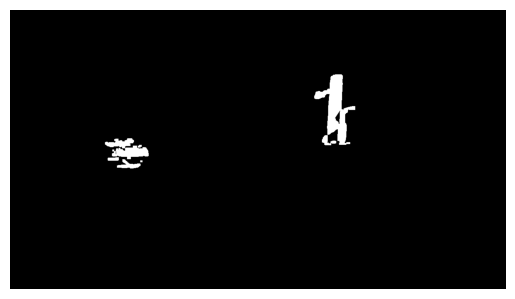

In [35]:
dilated_image = cv2.dilate(thresh, None, iterations=2)
plt.imshow(dilated_image, cmap='gray')
plt.axis('off')
plt.show

In [40]:
cnts = cv2.findContours(dilated_image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
# cnts

In [48]:
# iterate the contours
for c in cnts:
    if cv2.contourArea(c) < 700:
        continue

    # get the bounding box coordinates
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(image2, (x, y), (x+w, y+h), (0, 255, 0), 2)

cv2.imshow('test', image2)
cv2.waitKey(10000)
cv2.destroyAllWindows()

## Test in Realtime / Video 


In [63]:
video_path = 'test.mp4'
# video_cap = cv2.VideoCapture(0) # capture from webcam
video_cap = cv2.VideoCapture(video_path)
static_frame = None

while True:
    success, frame = video_cap.read()
    if not success:
        break

    frame = cv2.resize(frame, (1280, 720))
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    if static_frame is None:
        static_frame = gray_frame
        continue

    # get the subtract frames
    diff, thresh = subtract_images(static_frame, gray_frame)
    dilated_image = cv2.dilate(thresh, None, iterations=2)

    # get contours
    cnts = cv2.findContours(dilated_image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)

    # iterate the contours
    for c in cnts:
        if cv2.contourArea(c) < 700:
            continue
    
        # get the bounding box coordinates
        (x, y, w, h) = cv2.boundingRect(c)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    cv2.imshow("Motion Detection", frame)

    # exit if any key is pressed
    if cv2.waitKey(1) & 0xFF != 255:
        break
    time.sleep(0.1)

video_cap.release()
cv2.destroyAllWindows()